Dataset terdiri dari 1000 baris dan 14 kolom.

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usia                      1000 non-null   int64  
 1   jenis_kelamin             1000 non-null   int64  
 2   tipe_nyeri_dada           1000 non-null   int64  
 3   tekanan_darah_istirahat   1000 non-null   int64  
 4   kolesterol                1000 non-null   int64  
 5   gula_darah_puasa          1000 non-null   int64  
 6   hasil_ekg_istirahat       1000 non-null   int64  
 7   detak_jantung_maks        1000 non-null   int64  
 8   angina_dipicu_olahraga    1000 non-null   int64  
 9   depresi_ST                1000 non-null   float64
 10  kemiringan_ST             1000 non-null   int64  
 11  jumlah_pembuluh_terlihat  1000 non-null   int64  
 12  thal                      1000 non-null   int64  
 13

,usia,jenis_kelamin,tipe_nyeri_dada,tekanan_darah_istirahat,kolesterol,gula_darah_puasa,hasil_ekg_istirahat,detak_jantung_maks,angina_dipicu_olahraga,depresi_ST,kemiringan_ST,jumlah_pembuluh_terlihat,thal,target
0,53,1,2,130,246,1,2,173,0,0.0,0,3,1,0
1,54,1,3,110,206,0,2,108,1,0.0,1,1,1,1
2,56,1,3,125,249,1,2,144,1,1.2,1,1,1,1
3,58,1,3,100,234,0,0,156,0,0.1,0,1,3,1
4,51,0,3,130,305,0,0,142,1,1.2,1,0,3,1


Kolom target yang digunakan: 'target'


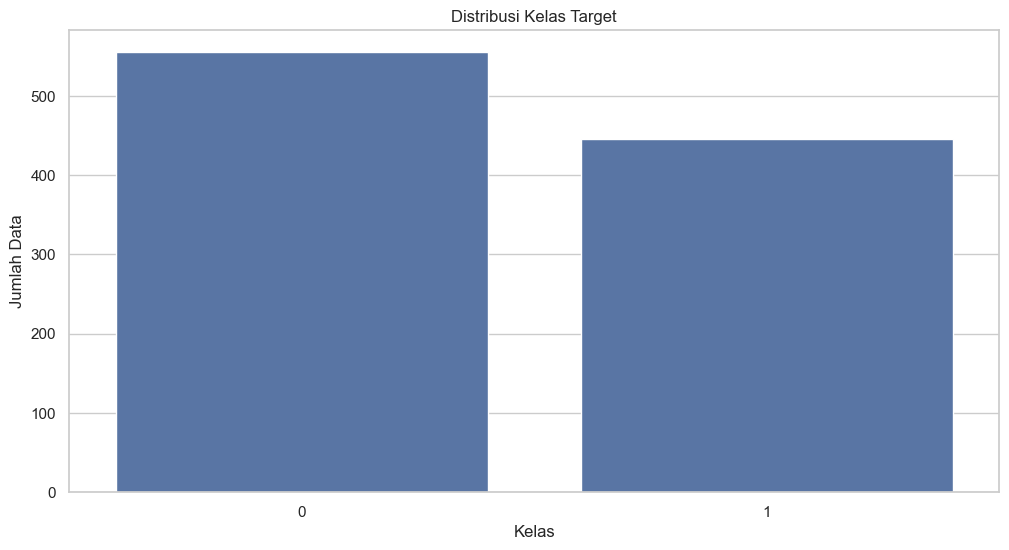


Jumlah data latih: 800
Jumlah data uji  : 200

Model berhasil dilatih.

Akurasi Model: 90.00%


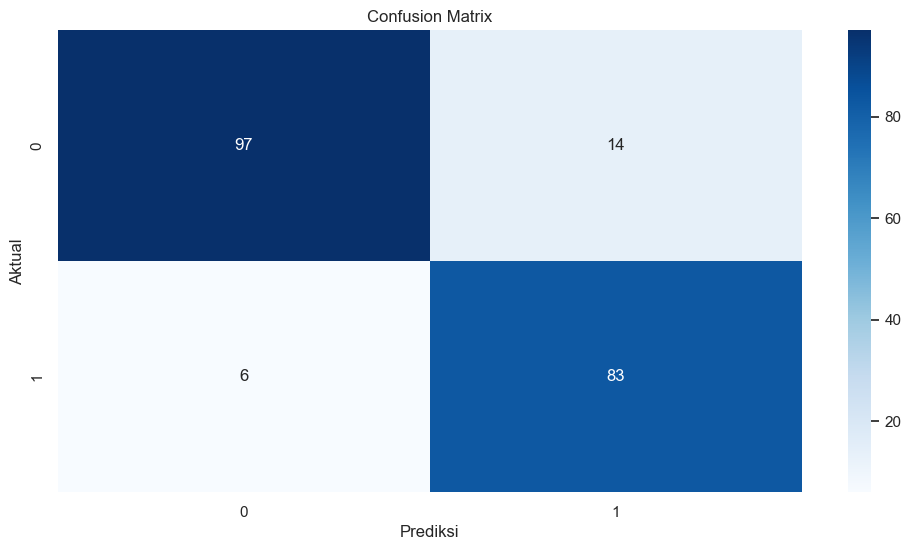


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       111
           1       0.86      0.93      0.89        89

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



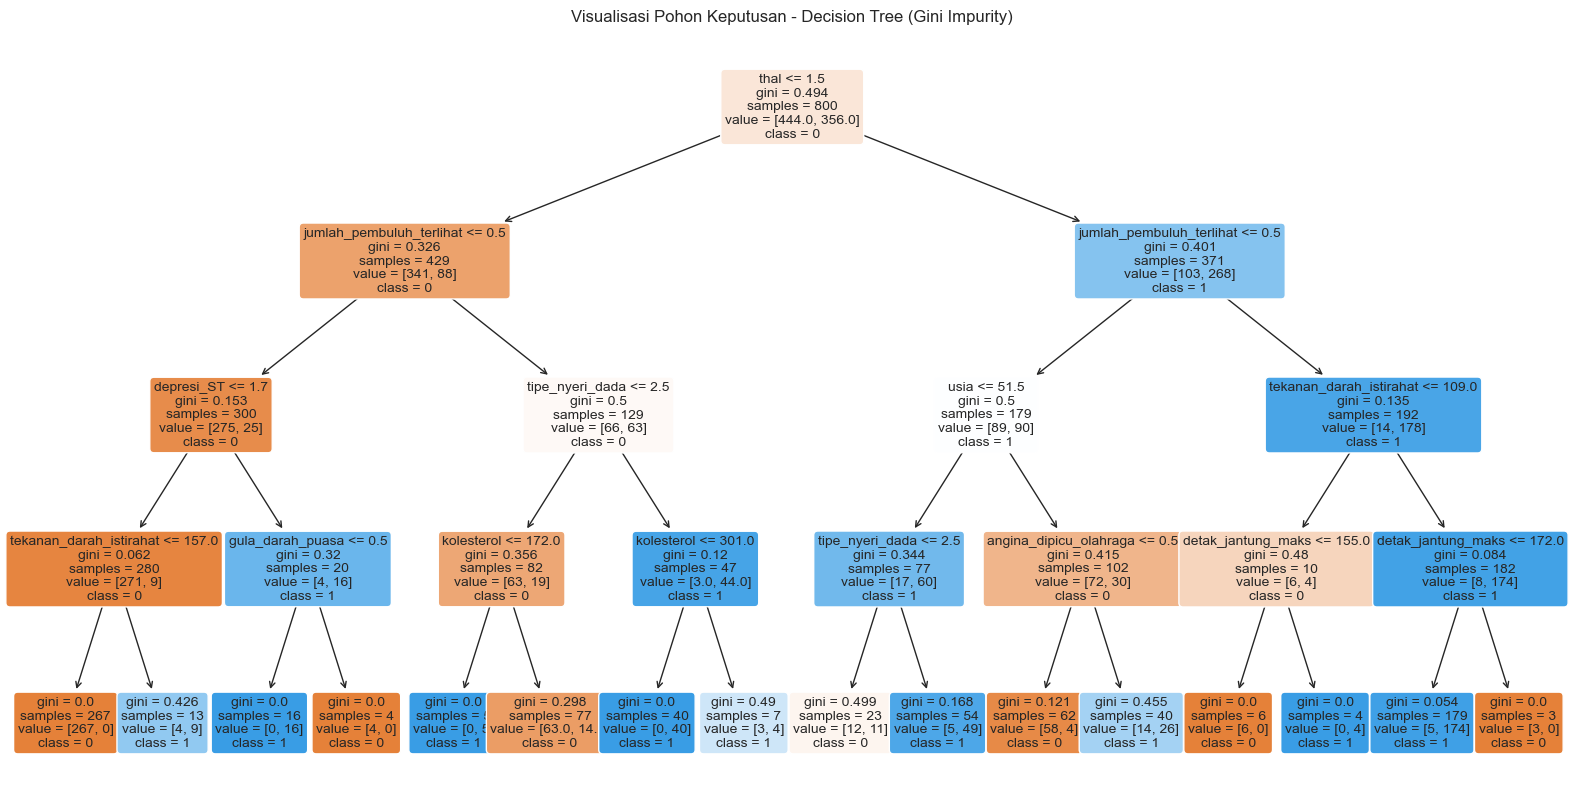

In [1]:
# =======================================
# 📘 1. Import Library yang Dibutuhkan
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Atur gaya visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# =======================================
# 📂 2. Load Dataset dari File CSV (1000 baris)
# =======================================
df = pd.read_csv("Heart_disease_1000_rows.csv")

# Menampilkan jumlah baris dan kolom
print(f"Dataset terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom.")

# =======================================
# 🔍 3. Eksplorasi Awal Dataset
# =======================================
print("\nInformasi Dataset:")
print(df.info())

print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())

print("\nContoh 5 Data Pertama:")
display(df.head())

# =======================================
# 🧹 4. Pra-pemrosesan Dataset
# =======================================
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)
    print("\nKolom 'ID' dihapus karena tidak relevan.")

# Menentukan kolom target secara otomatis (kolom terakhir)
target_col = df.columns[-1]
print(f"Kolom target yang digunakan: '{target_col}'")

# =======================================
# ✂️ 5. Pisahkan Fitur dan Target
# =======================================
X = df.drop(columns=[target_col])
y = df[target_col]

# Distribusi kelas target
sns.countplot(x=y)
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

# =======================================
# 🔀 6. Membagi Data Menjadi Train dan Test
# =======================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nJumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji  : {X_test.shape[0]}")

# =======================================
# 🌳 7. Melatih Model Decision Tree
# =======================================
tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
tree_clf.fit(X_train, y_train)
print("\nModel berhasil dilatih.")

# =======================================
# 📈 8. Evaluasi Model dengan Data Uji
# =======================================
y_pred = tree_clf.predict(X_test)

print("\nAkurasi Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =======================================
# 🌲 9. Visualisasi Decision Tree
# =======================================
plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=[str(c) for c in tree_clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan - Decision Tree (Gini Impurity)")
plt.show()
